In [42]:
import propagators
import energy_landscapes
import energy_landscapes_gaussian
import long_simulation
import weighted_ensemble_3
import numpy as np
import MSM_methods
import analysis

import matplotlib.pyplot as plt
import importlib

#methods for fast print debugging
def p(x):
    print(x)
def pl(x):
    print(len(x))
def ps(x):
    print(x.shape)

kT = 1
dt = 0.001
n_analysis_bins = 50
save_period = 100 #in steps
aggregate_simulation_limit = 10000000
#nsteps = 100000
n_parallel = 300
n_bootstrap = 3

# system1 = energy_landscapes.unit_double_well()
# system1.plot_quantity(system1.potential)
# system1.plot_quantity(system1.F)
#system1.analysis_bins(40)


<function long_simulation_histogram_analysis at 0x7fc4e2ce93f0>
round 0


/Users/jonathanborowsky/Documents/grabelab/methods-development/sampling-methods/long_simulation.py:143: RuntimeWarning: divide by zero encountered in reciprocal
  mfpts = save_period*np.reciprocal(n_transitions)*frames_by_state


round 1
round 2


/opt/anaconda3/envs/grabelab/lib/python3.10/site-packages/numpy/core/_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


<function long_simulation_msm_analysis at 0x7fc4d4a1e3b0>
round 0
eigenvector converged to within 10^-12 after 0 rounds
round 1
eigenvector converged to within 10^-12 after 1 rounds
round 2
eigenvector converged to within 10^-12 after 0 rounds
<function long_simulation_hamsm_analysis at 0x7fc4e2cead40>
round 0
eigenvector converged to within 10^-12 after 0 rounds
round 1
eigenvector converged to within 10^-12 after 0 rounds
round 2
eigenvector converged to within 10^-12 after 0 rounds
<function weighted_ensemble_msm_analysis at 0x7fc4e2ceac20>
round 0
Each bin can hold up to 6 walkers, for a total of up to about 300 walkers
0
33
66
99
132
165
198
231
264
297
330
eigenvector converged to within 10^-12 after 22 rounds
round 1
Each bin can hold up to 6 walkers, for a total of up to about 300 walkers
0
33
66
99
132
165
198
231
264
297
330
eigenvector converged to within 10^-12 after 27 rounds
round 2
Each bin can hold up to 6 walkers, for a total of up to about 300 walkers
0
33
66
99
132
1

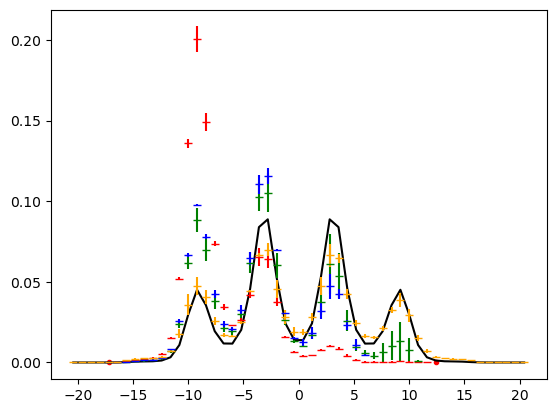

In [45]:
importlib.reload(analysis)
importlib.reload(long_simulation)
importlib.reload(weighted_ensemble_3)
importlib.reload(propagators)
importlib.reload(energy_landscapes_gaussian)
importlib.reload(energy_landscapes)
importlib.reload(MSM_methods)

system1 = energy_landscapes.unit_sine_well()

#long_simulation.long_simulation_histogram_analysis, long_simulation.long_simulation_hamsm_analysis, weighted_ensemble_2.weighted_ensemble_hamsm_analysis
mfpts_all, populations_all = analysis.bootstrap_method_comparison(3, [long_simulation.long_simulation_histogram_analysis, long_simulation.long_simulation_msm_analysis, long_simulation.long_simulation_hamsm_analysis, weighted_ensemble_3.weighted_ensemble_msm_analysis], system1, kT, dt, aggregate_simulation_limit, n_parallel, save_period, n_analysis_bins)

analysis.plot_bootstrapping_results(populations_all, system1, kT, n_analysis_bins)

#TODO implement MFPT comparison
#TODO fast synthetic trajectories
#